In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import keras

from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras import regularizers

In [6]:
ds = pd.read_csv('train.csv')
data = ds.values[:5000]


In [7]:
X = data[:, 1:]/255.0
y = np_utils.to_categorical(data[:, 0])

print X.shape, y.shape

(5000, 784) (5000, 10)


In [8]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(4000, 784) (1000, 784)
(4000, 10) (1000, 10)


In [9]:
model = Sequential()
act = 'relu'

model.add(Dense(430, input_shape=(784,)))
model.add(Activation(act))
# model.add(Dropout(0.42))

model.add(Dense(256))
model.add(Activation(act))

model.add(Dense(148))
model.add(Activation(act))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 430)               337550    
_________________________________________________________________
activation_1 (Activation)    (None, 430)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               110336    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 148)               38036     
_________________________________________________________________
activation_3 (Activation)    (None, 148)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1490      
__________

In [10]:
hist = model.fit(X_train, y_train,
                epochs=20,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test), verbose=2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
0s - loss: 0.8385 - acc: 0.7665 - val_loss: 0.3492 - val_acc: 0.8880
Epoch 2/20
0s - loss: 0.2961 - acc: 0.9073 - val_loss: 0.3154 - val_acc: 0.9020
Epoch 3/20
0s - loss: 0.1787 - acc: 0.9455 - val_loss: 0.2409 - val_acc: 0.9250
Epoch 4/20
0s - loss: 0.1099 - acc: 0.9703 - val_loss: 0.2211 - val_acc: 0.9290
Epoch 5/20
0s - loss: 0.0681 - acc: 0.9835 - val_loss: 0.2117 - val_acc: 0.9360
Epoch 6/20
0s - loss: 0.0376 - acc: 0.9910 - val_loss: 0.2020 - val_acc: 0.9420
Epoch 7/20
0s - loss: 0.0232 - acc: 0.9965 - val_loss: 0.2122 - val_acc: 0.9390
Epoch 8/20
0s - loss: 0.0133 - acc: 0.9988 - val_loss: 0.2000 - val_acc: 0.9460
Epoch 9/20
0s - loss: 0.0080 - acc: 0.9998 - val_loss: 0.2013 - val_acc: 0.9490
Epoch 10/20
0s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.2053 - val_acc: 0.9530
Epoch 11/20
0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.2041 - val_acc: 0.9530
Epoch 12/20
0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2081 - val_a

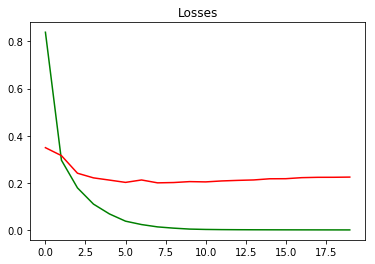

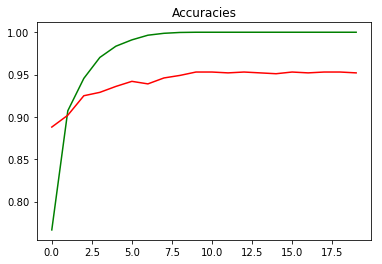

In [11]:
h_data = hist.history

plt.figure(0)
plt.title('Losses')
plt.plot(h_data['loss'], 'green')
plt.plot(h_data['val_loss'], 'red')

plt.figure(1)
plt.title('Accuracies')
plt.plot(h_data['acc'], 'green')
plt.plot(h_data['val_acc'], 'red')

plt.show()